There do seem to be legitimate cases of negative CPRs. I'm going to remove them from the dataset, in the absence of a better idea.

In [1]:
import os
os.chdir("/home/charles/src/LondonMirror/Prepayments/")

import prepayments as pp
import numpy as np
import pandas as pd
import ggplot as gg
import datetime

pm = pp.models.PoolModel()

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [10]:
samples = list(set(pm.data_pool.h5file.root.candidate_pools.col("cusip")))
len(samples)

45167

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
import cPickle as pickle

In [11]:
samples[0]

'36188SK21'

In [16]:
pm.data_for_cusip_random_dt(samples[0])

{'burnout': 6718.0,
 'cato': -0.57539999999999991,
 'dt': Timestamp('2016-09-01 00:00:00'),
 'hpa': 0.050209489876183816,
 'incentive': 839.0,
 'lockin': 0.8030054003287157,
 'next_month_cpr': 30.780000000000001,
 'seasonality': 9,
 'upfront_mip': 17.948717948717949,
 'wala': 12}

In [18]:
data = {i:pm.data_for_cusip_random_dt(i) for i in samples}
#pickle.dump(data, open("/media/gdaa/Charles/prepayment/sample_data2.pickle", "wb"))

ERROR:root:No CPR data for 36214DT23
ERROR:root:No CPR data for 36206B5C1
ERROR:root:No CPR data for 36291S3J7
ERROR:root:Pools table has no records for 36218KFQ5
ERROR:root:No CPR data for 36179QBR1
ERROR:root:No CPR data for 36292ANJ3
ERROR:root:No CPR data for 362160VS9
ERROR:root:No CPR data for 36294PXH1
ERROR:root:No CPR data for 36296KV66
ERROR:root:No CPR data for 36202BFR1
ERROR:root:Pools table has no records for 36216HCZ7
ERROR:root:Pools table has no records for 36208LMR5
ERROR:root:No CPR data for 36179Q6F3
ERROR:root:No CPR data for 36220ASF3
ERROR:root:Pools table has no records for 36296N6A9
ERROR:root:No CPR data for 36200G6T8
ERROR:root:No CPR data for 36291PD86
ERROR:root:No CPR data for 36214JYY4
ERROR:root:No CPR data for 36202DEC1
ERROR:root:No CPR data for 36202ETM1
ERROR:root:No CPR data for 362164LY9
ERROR:root:No CPR data for 36211JA23
ERROR:root:No CPR data for 36223C6Q6
ERROR:root:No CPR data for 36291V5L3
ERROR:root:No CPR data for 36295FQN7
ERROR:root:No C

In [19]:
jim = pd.DataFrame.from_dict({k:v for k,v in data.items() if v is not None}, orient="index")

In [20]:
jim = jim.where(jim.next_month_cpr >= 0).dropna()

In [21]:
jim.to_csv("/media/gdaa/Charles/prepayment/sample_data.csv")
jim.to_csv("/data/prepayments/samples.csv")

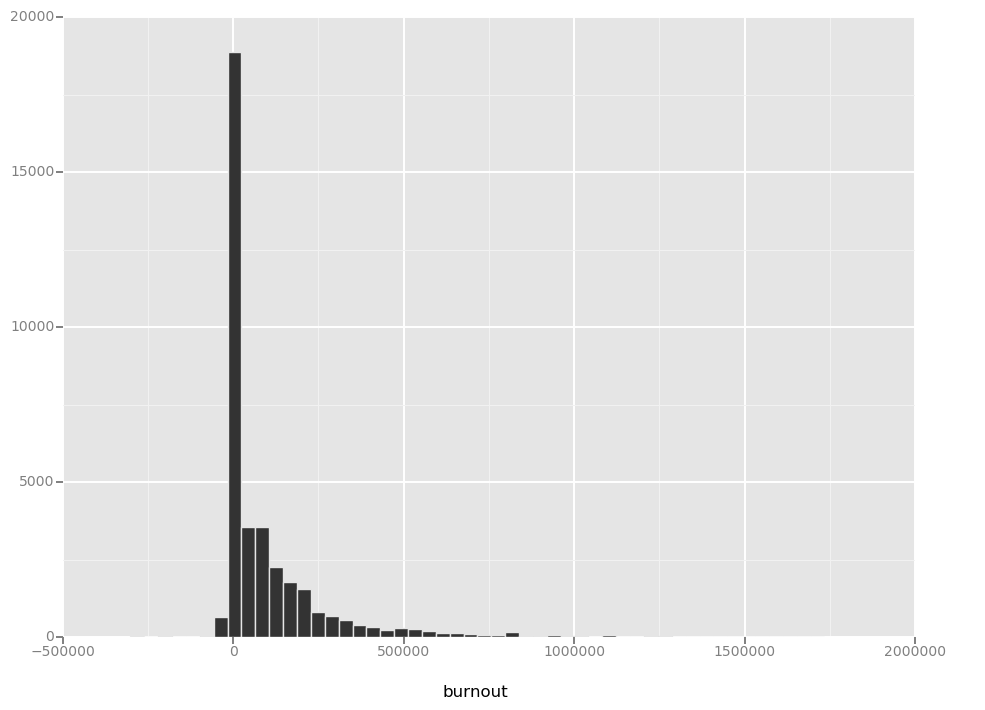

<ggplot: (8727290171049)>

In [22]:
gg.ggplot(jim, gg.aes(x='burnout')) + gg.geom_histogram(bins=50)

In [23]:
jim.shape

(36961, 10)

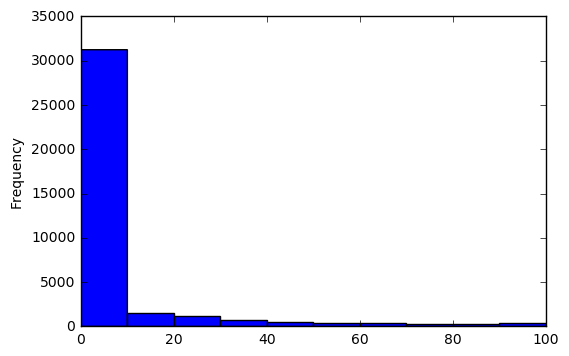

In [24]:
jim.next_month_cpr.plot.hist()

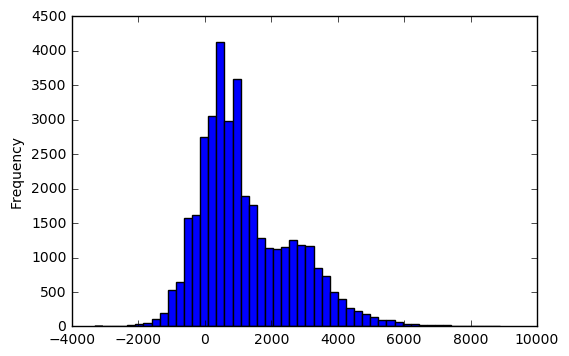

In [26]:
jim.incentive.plot.hist(bins=50)

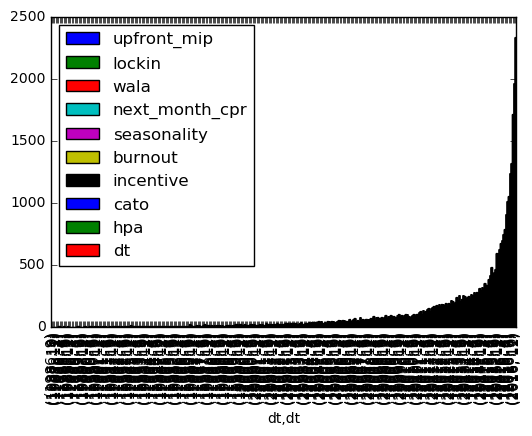

In [30]:
jim.groupby([jim.dt.dt.year, jim.dt.dt.month]).count().plot(kind="bar")